In [1]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
from pyspark.sql.functions import *

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Кредиты

In [8]:
df = spark.read.csv("./data/loans.csv", inferSchema = True, header = True)

In [5]:
df.printSchema()

root
 |-- Customer_ID: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Marital Status: string (nullable = true)
 |-- Family Size: integer (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Expenditure: integer (nullable = true)
 |-- Use Frequency: integer (nullable = true)
 |-- Loan Category: string (nullable = true)
 |-- Loan Amount: string (nullable = true)
 |-- Overdue: integer (nullable = true)
 |--  Debt Record: integer (nullable = true)
 |--  Returned Cheque: integer (nullable = true)
 |--  Dishonour of Bill: integer (nullable = true)



In [4]:
df.show(5)

+-----------+---+------+------------+--------------+-----------+------+-----------+-------------+-------------+-----------+-------+------------+----------------+------------------+
|Customer_ID|Age|Gender|  Occupation|Marital Status|Family Size|Income|Expenditure|Use Frequency|Loan Category|Loan Amount|Overdue| Debt Record| Returned Cheque| Dishonour of Bill|
+-----------+---+------+------------+--------------+-----------+------+-----------+-------------+-------------+-----------+-------+------------+----------------+------------------+
|    IB14001| 30|  MALE|BANK MANAGER|        SINGLE|          4| 50000|      22199|            6|      HOUSING| 10,00,000 |      5|       42898|               6|                 9|
|    IB14008| 44|  MALE|   PROFESSOR|       MARRIED|          6| 51000|      19999|            4|     SHOPPING|      50000|      3|       33999|               1|                 5|
|    IB14012| 30|FEMALE|     DENTIST|        SINGLE|          3| 58450|      27675|            

In [6]:
len(df.columns)

15

In [7]:
df.count()

500

In [8]:
df.distinct().count()

500

In [11]:
# количество займов в каждой категории
df.groupBy("Loan Category").count().orderBy("count", ascending = False).show()

+------------------+-----+
|     Loan Category|count|
+------------------+-----+
|         GOLD LOAN|   77|
|           HOUSING|   67|
|        AUTOMOBILE|   60|
|        TRAVELLING|   53|
|       RESTAURANTS|   41|
|          SHOPPING|   35|
|COMPUTER SOFTWARES|   35|
|          BUSINESS|   24|
|  EDUCATIONAL LOAN|   20|
|        RESTAURANT|   20|
|       ELECTRONICS|   14|
|   HOME APPLIANCES|   14|
|           DINNING|   14|
|       AGRICULTURE|   12|
|       BOOK STORES|    7|
|          BUILDING|    7|
+------------------+-----+



In [14]:
# количество клиентов с суммой кредита более 100 000
df.filter(df["Loan Amount"]>"1,00,000").count()

379

In [18]:
# количество клиентов с доходом больше 60 000
df.filter(df["Income"]>"60000").count()

198

In [26]:
# количество клиентов с двумя и более возвращёнными чеками и доходом менее 50 000
df.filter((df[" Returned Cheque"]>"1") & (df["Income"]<"50000")).count()

137

In [27]:
# количество клиентов с двумя и более возвращёнными чеками и статусом 'single'
df.filter((df[" Returned Cheque"]>"1") & (df["Marital Status"]<"SINGLE")).count()

283

In [6]:
# количество клиентов с расходами больше 50 000 в месяц 
df.filter((df["Expenditure"]>"50000")).show()

+-----------+---+------+---------------+--------------+-----------+------+-----------+-------------+-------------+-----------+-------+------------+----------------+------------------+
|Customer_ID|Age|Gender|     Occupation|Marital Status|Family Size|Income|Expenditure|Use Frequency|Loan Category|Loan Amount|Overdue| Debt Record| Returned Cheque| Dishonour of Bill|
+-----------+---+------+---------------+--------------+-----------+------+-----------+-------------+-------------+-----------+-------+------------+----------------+------------------+
|    IB14158| 54|  MALE|AIRPORT OFFICER|       MARRIED|          6| 80000|      62541|            2|   AUTOMOBILE| 20,45,789 |      1|       16599|               2|                 3|
|    IB14176| 54|  MALE|AIRPORT OFFICER|       MARRIED|          6| 80000|      62541|            2|      HOUSING| 20,45,789 |      1|       16599|               2|                 3|
|    IB14204| 54|  MALE|AIRPORT OFFICER|       MARRIED|          6| 81000|      

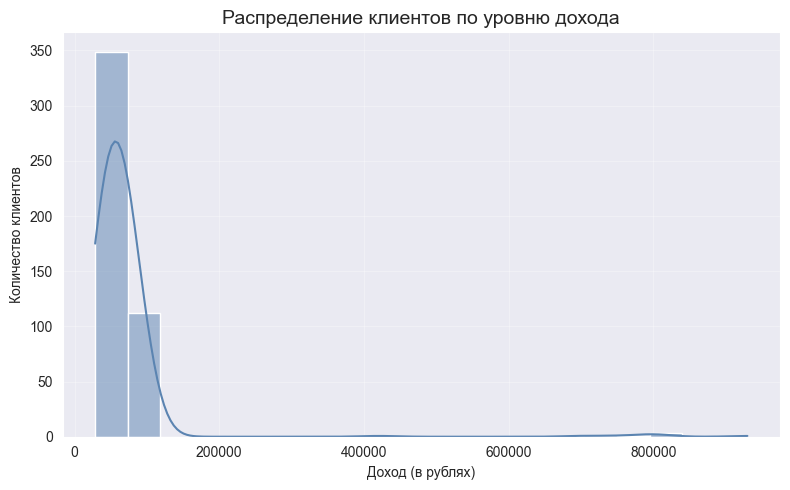

In [4]:
loan = pd.read_csv("./data/loans.csv")

plt.figure(figsize=(8,5))
sns.histplot(loan['Income'], bins=20, kde=True, color="#5B84B1FF")
plt.title("Распределение клиентов по уровню дохода", fontsize=14)
plt.xlabel("Доход (в рублях)")
plt.ylabel("Количество клиентов")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Кредитные карты

In [9]:
dfc = spark.read.csv("./data/credit_cards.csv", inferSchema = True, header = True)

In [10]:
dfc.printSchema()

root
 |-- RowNumber: integer (nullable = true)
 |-- CustomerId: integer (nullable = true)
 |-- Surname: string (nullable = true)
 |-- CreditScore: integer (nullable = true)
 |-- Geography: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tenure: integer (nullable = true)
 |-- Balance: double (nullable = true)
 |-- NumOfProducts: integer (nullable = true)
 |-- IsActiveMember: integer (nullable = true)
 |-- EstimatedSalary: double (nullable = true)
 |-- Exited: integer (nullable = true)



In [17]:
len(dfc.columns)

13

In [16]:
dfc.count()

10000

In [18]:
dfc.distinct().count()

10000

In [11]:
dfc.show(5)

+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+--------------+---------------+------+
|RowNumber|CustomerId| Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+--------------+---------------+------+
|        1|  15634602|Hargrave|        619|   France|Female| 42|     2|      0.0|            1|             1|      101348.88|     1|
|        2|  15647311|    Hill|        608|    Spain|Female| 41|     1| 83807.86|            1|             1|      112542.58|     0|
|        3|  15619304|    Onio|        502|   France|Female| 42|     8| 159660.8|            3|             0|      113931.57|     1|
|        4|  15701354|    Boni|        699|   France|Female| 39|     1|      0.0|            2|             0|       93826.63|     0|
|        5|  15737888|Mitchell|        850|    Spain|Female| 4

In [13]:
# количество клиентов, имеющих право на кредитную карту
dfc.filter(dfc["CreditScore"]>700).count()

3116

In [19]:
# количество клиентов, которые и имеют право на кредитную карту, и являются активными
dfc.filter((dfc["IsActiveMember"]==1) & (dfc["CreditScore"]>700)).count()

1637

In [21]:
# пользователи кредитных карт из Испании 
dfc.filter(dfc["Geography"]=="Spain").show()

+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+--------------+---------------+------+
|RowNumber|CustomerId|  Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+--------------+---------------+------+
|        2|  15647311|     Hill|        608|    Spain|Female| 41|     1| 83807.86|            1|             1|      112542.58|     0|
|        5|  15737888| Mitchell|        850|    Spain|Female| 43|     2|125510.82|            1|             1|        79084.1|     0|
|        6|  15574012|      Chu|        645|    Spain|  Male| 44|     8|113755.78|            2|             0|      149756.71|     1|
|       12|  15737173|  Andrews|        497|    Spain|  Male| 24|     3|      0.0|            2|             0|       76390.01|     0|
|       15|  15600882|    Scott|        635|    Spain|F

In [24]:
dfc.filter((dfc["EstimatedSalary"]>100000) & (dfc["Exited"]==1)).count()

1044

In [25]:
dfc.filter((dfc["EstimatedSalary"]<100000) & (dfc["NumOfProducts"]>1)).count()

2432

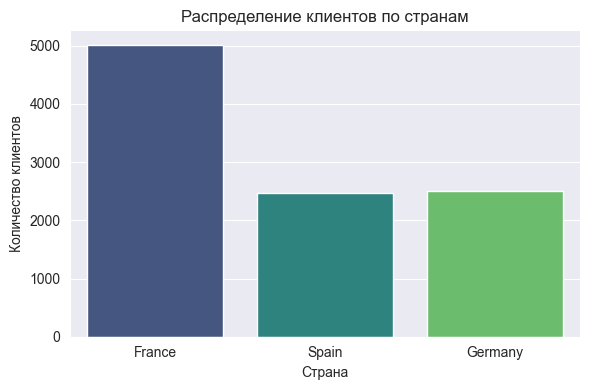

In [15]:
df = pd.read_csv("./data/credit_cards.csv")

plt.figure(figsize=(6,4))
ax = sns.countplot(
    data=df,
    x='Geography',
    hue='Geography',
    palette='viridis'
)

plt.title('Распределение клиентов по странам')
plt.xlabel('Страна')
plt.ylabel('Количество клиентов')
plt.tight_layout()
plt.show()
plt.show()

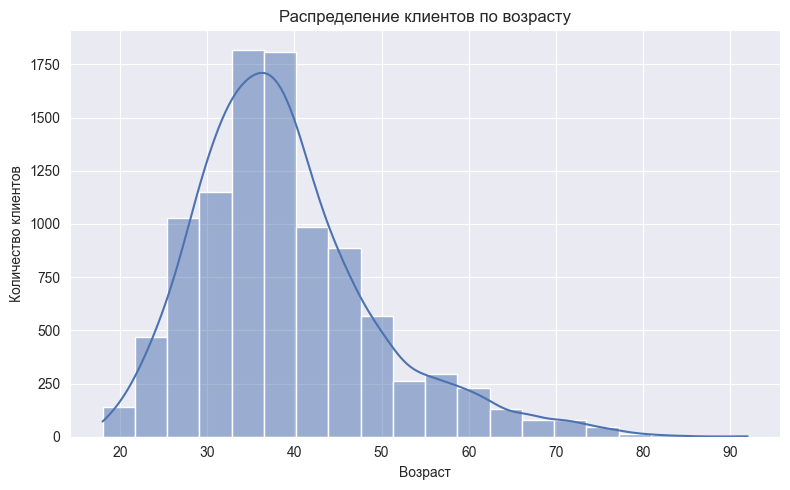

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color='#4C72B0')
plt.title('Распределение клиентов по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.tight_layout()
plt.show()

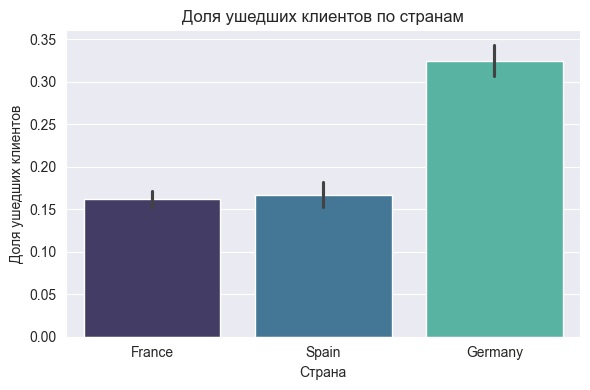

In [11]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=df,
    x='Geography',
    y='Exited',
    estimator='mean',
    hue='Geography',
    palette='mako',
    legend=False
)
plt.title('Доля ушедших клиентов по странам')
plt.xlabel('Страна')
plt.ylabel('Доля ушедших клиентов')
plt.tight_layout()
plt.show()

## Транзакции

In [2]:
txn = spark.read.csv("./data/transactions.csv", inferSchema=True, header =True)

In [3]:
txn.printSchema()

root
 |-- Account No: string (nullable = true)
 |-- TRANSACTION DETAILS: string (nullable = true)
 |-- VALUE DATE: string (nullable = true)
 |--  WITHDRAWAL AMT : double (nullable = true)
 |--  DEPOSIT AMT : double (nullable = true)
 |-- BALANCE AMT: double (nullable = true)



In [4]:
# количество транзакций по каждому счёту
txn.groupBy("Account No").count().show()

+-------------+-----+
|   Account No|count|
+-------------+-----+
|409000438611'| 4588|
|     1196711'|10536|
|     1196428'|48779|
|409000493210'| 6014|
|409000611074'| 1093|
|409000425051'|  802|
|409000405747'|   51|
|409000362497'|29840|
|409000493201'| 1044|
|409000438620'|13454|
+-------------+-----+



In [26]:
# максимальная сумма снятия по каждому счёту
txn.groupBy("Account No").max(" WITHDRAWAL AMT ").orderBy("max( WITHDRAWAL AMT )", ascending = False).show()

+-------------+---------------------+
|   Account No|max( WITHDRAWAL AMT )|
+-------------+---------------------+
|     1196711'|        4.594475464E8|
|409000438620'|                4.0E8|
|409000425051'|               3.54E8|
|409000438611'|                2.4E8|
|409000405747'|                1.7E8|
|     1196428'|                1.5E8|
|409000362497'|        1.413662392E8|
|409000493210'|                1.5E7|
|409000493201'|            2500000.0|
|409000611074'|             912000.0|
+-------------+---------------------+



In [24]:
# минимальная сумма снятия по счёту
txn.groupBy("Account No").min(" WITHDRAWAL AMT ").orderBy("min( WITHDRAWAL AMT )").show()

+-------------+---------------------+
|   Account No|min( WITHDRAWAL AMT )|
+-------------+---------------------+
|409000493210'|                 0.01|
|409000438611'|                  0.2|
|     1196711'|                 0.25|
|     1196428'|                 0.25|
|409000438620'|                 0.34|
|409000362497'|                 0.97|
|409000425051'|                 1.25|
|409000493201'|                  2.1|
|409000405747'|                 21.0|
|409000611074'|                120.0|
+-------------+---------------------+



In [28]:
# максимальная сумма пополнения по счёту
txn.groupBy("Account No").max(" DEPOSIT AMT ").orderBy("max( DEPOSIT AMT )", ascending = False).show()

+-------------+------------------+
|   Account No|max( DEPOSIT AMT )|
+-------------+------------------+
|409000438620'|           5.448E8|
|     1196711'|             5.0E8|
|     1196428'|     2.119594422E8|
|409000405747'|           2.021E8|
|409000362497'|             2.0E8|
|409000438611'|          1.7025E8|
|409000425051'|             1.5E7|
|409000493210'|             1.5E7|
|409000611074'|         3000000.0|
|409000493201'|         1000000.0|
+-------------+------------------+



In [29]:
# минимальная сумма пополнения по счёту
txn.groupBy("Account No").min(" DEPOSIT AMT ").orderBy("min( DEPOSIT AMT )").show()

+-------------+------------------+
|   Account No|min( DEPOSIT AMT )|
+-------------+------------------+
|409000493210'|              0.01|
|409000438611'|              0.03|
|409000362497'|              0.03|
|409000438620'|              0.07|
|409000493201'|               0.9|
|     1196428'|               1.0|
|409000425051'|               1.0|
|     1196711'|              1.01|
|409000405747'|             500.0|
|409000611074'|            1320.0|
+-------------+------------------+



In [9]:
# сумма баланса по каждому банковскому счёту
txn.groupBy("Account No").sum("BALANCE AMT").show()

+-------------+--------------------+
|   Account No|    sum(BALANCE AMT)|
+-------------+--------------------+
|409000438611'|-2.49486577068339...|
|     1196711'|-1.60476498101275E13|
|     1196428'| -8.1418498130721E13|
|409000493210'|-3.27584952132095...|
|409000611074'|       1.615533622E9|
|409000425051'|-3.77211841164998...|
|409000405747'|-2.43108047067000...|
|409000362497'| -5.2860004792808E13|
|409000493201'|1.0420831829499985E9|
|409000438620'|-7.12291867951358...|
+-------------+--------------------+



In [32]:
# количество транзакций по каждой дате
txn.groupBy("VALUE DATE").count().orderBy("count", ascending = False).show()

+----------+-----+
|VALUE DATE|count|
+----------+-----+
| 27-Jul-17|  567|
| 13-Aug-18|  463|
|  8-Nov-17|  402|
|  7-Oct-17|  382|
| 10-Jul-18|  374|
| 12-Dec-17|  367|
| 12-Sep-18|  365|
|  9-Aug-18|  360|
| 19-Sep-17|  358|
| 16-Mar-17|  353|
| 10-Sep-18|  344|
| 14-Jul-17|  333|
|  7-Mar-18|  319|
| 11-Oct-18|  303|
| 22-Aug-17|  301|
|  9-Jan-18|  299|
|  9-Oct-18|  297|
| 20-Apr-18|  296|
|  9-Jul-18|  292|
|  7-Apr-18|  291|
+----------+-----+
only showing top 20 rows



In [33]:
# клиенты с суммой снятия более 100 000
txn.select("Account No","TRANSACTION DETAILS"," WITHDRAWAL AMT ").filter(txn[" WITHDRAWAL AMT "]>100000).show()

+-------------+--------------------+----------------+
|   Account No| TRANSACTION DETAILS| WITHDRAWAL AMT |
+-------------+--------------------+----------------+
|409000611074'|INDO GIBL Indiafo...|        133900.0|
|409000611074'|INDO GIBL Indiafo...|        195800.0|
|409000611074'|INDO GIBL Indiafo...|        143800.0|
|409000611074'|INDO GIBL Indiafo...|        331650.0|
|409000611074'|INDO GIBL Indiafo...|        129000.0|
|409000611074'|INDO GIBL Indiafo...|        230013.0|
|409000611074'|INDO GIBL Indiafo...|        367900.0|
|409000611074'|INDO GIBL Indiafo...|        108000.0|
|409000611074'|INDO GIBL Indiafo...|        141000.0|
|409000611074'|INDO GIBL Indiafo...|        206000.0|
|409000611074'|INDO GIBL Indiafo...|        242300.0|
|409000611074'|INDO GIBL Indiafo...|        113250.0|
|409000611074'|INDO GIBL Indiafo...|        206900.0|
|409000611074'|INDO GIBL Indiafo...|        276000.0|
|409000611074'|INDO GIBL Indiafo...|        171000.0|
|409000611074'|INDO GIBL Ind

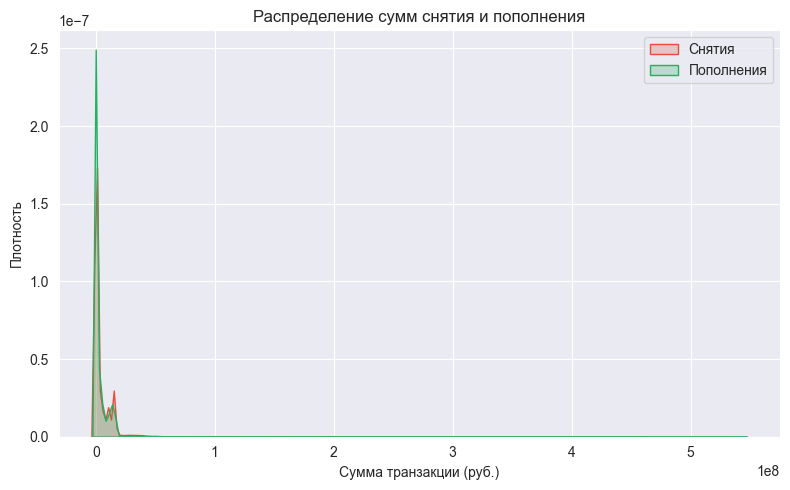

In [23]:
plt.figure(figsize=(8,5))
sns.kdeplot(txn[' WITHDRAWAL AMT '], fill=True, label='Снятия', color='#E74C3C')
sns.kdeplot(txn[' DEPOSIT AMT '], fill=True, label='Пополнения', color='#27AE60')
plt.title("Распределение сумм снятия и пополнения")
plt.xlabel("Сумма транзакции (руб.)")
plt.ylabel("Плотность")
plt.legend()
plt.tight_layout()
plt.show()